### Decoy Effect

This notebook aims to recreate some findings concerning the **Decoy Effect**. Specifically, we recreate the event described in https://thestrategystory.com/2020/10/02/economist-magazine-a-story-of-clever-decoy-pricing/ with numbers taken from https://en.wikipedia.org/wiki/Decoy_effect.

As of right now, the LLM does not know about the Decoy Effect and mostly chooses the answer option which comes with the most features. One certain aspect to be researched might be the determination of a threshold after which A becomes the dominant option. Although this threshold would not really hold any informative meaning. 
When priming the model as a market researcher and mentioning the Decoy Effect, some distribution amongst the answers can be observed. However, the degree to which the answers change once the decoy product is removed does not resemble the previous empirical findings. 

In [13]:
from openai import OpenAI
import openai
import matplotlib.pyplot as plt
import os 

In [2]:
# Get API key (previously saved as environmental variable)
openai.api_key = os.environ["OPENAI_API_KEY"]

# Set client
client = OpenAI()

Cited from Wikipedia:

Another example shown in Dan Ariely's book Predictably Irrational was a true case used by The Economist magazine.[4] The subscription screen presented three options:

    - Economist.com subscription - US $59.00. One-year subscription to Economist.com. Includes online access to all articles from The Economist since 1997
    - Print subscription - US $125.00. One-year subscription to the print edition of The Economist
    - Print & web subscription - US $125.00. One-year subscription to the print edition of The Economist and online access to all articles from The Economist since 1997

Given these choices, 16% of the students in the experiment conducted by Ariely chose the first option, 0% chose the middle option, and 84% chose the third option. Even though nobody picked the second option, when he removed that option the result was the inverse: 68% of the students picked the online-only option, and 32% chose the print and web option

Scenario 1: All three alternatives are available.
Scenario 2: The second option (decoy) is removed.

|Answer option          | Scenario 1 | Scenario 2 (no 2nd option)|
|-----------------------|--------------|-----------|
| Online subscription   |     16%      |  68%       |
| Print subscribtion    |      0%     | 0%        |
| Combination           |     84%   | 32%        |


In [3]:
answers = []
for _ in range(10): # original experiment had 87 answers
    response = client.chat.completions.create(
        model = "gpt-4-1106-preview", # model = "gpt-3.5-turbo", "gpt-4", "gpt-4-1106-preview"
        max_tokens = 1,
        temperature = 1, # range is 0 to 2
        messages = [
        {"role": "user", "content": """You are presented with three different subsciption alternatives for the "The Economist" magazine:
         A: 1-year Economist.com subscription for $59.00, including access to all articles from 1997 onwards.
         B: 1-year Print subscription to The Economist for $125.00.
         C: Print & web subscription for 125$: 1-year subscription to the print edition of The Econnomist and online access to all articles from 1997 onwards.
         Which alternative would you choose? Please answer by only giving the letter of the alternative you would choose without any reasoning. 
         """},
                   ])

    # Store the answer in the list
    answer = response.choices[0].message.content
    answers.append(answer.strip())
    

In [4]:
# Collecting results without priming
A = answers.count("A")
B = answers.count("B")
C = answers.count("C")

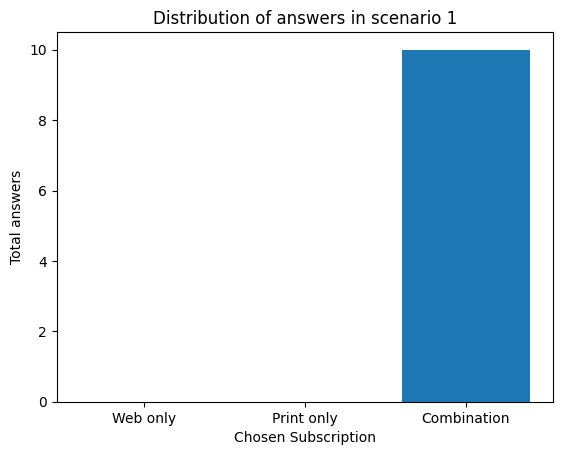

In [6]:
# Set labels
labels = ['Web only', 'Print only', 'Combination']

# Create a bar graph
plt.bar(labels, [A, B, C])

# Add labels and a title
plt.xlabel('Chosen Subscription')
plt.ylabel('Total answers')
plt.title('Distribution of answers in scenario 1')

# Show the plot
plt.show()

### Removing the second (decoy) option

In [7]:
answers_2 = []
for _ in range(10): # original experiment had 87 answers
    response = client.chat.completions.create(
        model = "gpt-4-1106-preview", # model = "gpt-3.5-turbo", "gpt-4", "gpt-4-1106-preview"
        max_tokens = 1,
        temperature = 1, # range is 0 to 2
        messages = [
        {"role": "user", "content": """You are presented with three different subsciption alternatives for the "The Economist" magazine:
         A: 1-year Economist.com subscription for $59.00, including access to all articles from 1997 onwards.
         B: 1-year Print subscription to The Economist for $125.00.
         C: Print & web subscription for 125$: 1-year subscription to the print edition of The Econnomist and online access to all articles from 1997 onwards.
         The Marketing team of The Economist however has now decided to remove option B. 
         Which remaining alternative would you choose? Please answer by only giving the letter of the alternative you would choose.
         """},
                   ])

    # Store the answer in the list
    answer = response.choices[0].message.content
    answers_2.append(answer.strip())
    

In [8]:
# Collecting results without priming
A_2 = answers_2.count("A")
B_2 = answers_2.count("B")
C_2 = answers_2.count("C")

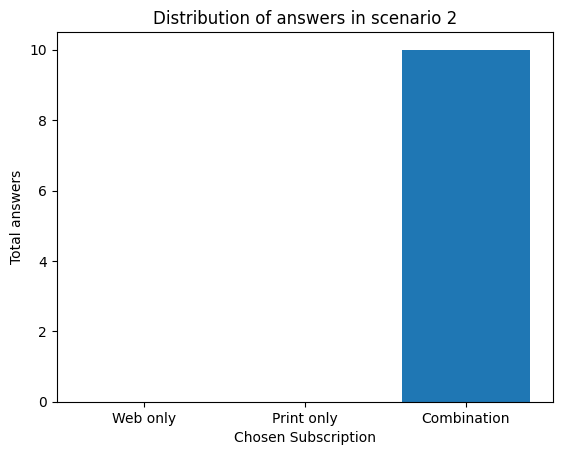

In [9]:
# Set labels
labels = ['Web only', 'Print only', 'Combination']

# Create a bar graph
plt.bar(labels, [A_2, B_2, C_2])

# Add labels and a title
plt.xlabel('Chosen Subscription')
plt.ylabel('Total answers')
plt.title('Distribution of answers in scenario 2')

# Show the plot
plt.show()

- Repeating scenario 2 priming the model as a market researcher

In [10]:
answers_2_mr = []
for _ in range(10): # original experiment had 87 answers
    response = client.chat.completions.create(
        model = "gpt-4-1106-preview", # model = "gpt-3.5-turbo", "gpt-4", "gpt-4-1106-preview"
        max_tokens = 1,
        temperature = 1, # range is 0 to 2
        messages = [
        {"role": "user", "content": """You are a market researcher that knows about the Decoy Effect. You are presented with three different subsciption alternatives for the "The Economist" magazine:
         A: 1-year Economist.com subscription for $59.00, including access to all articles from 1997 onwards.
         B: 1-year Print subscription to The Economist for $125.00.
         C: Print & web subscription for 125$: 1-year subscription to the print edition of The Econnomist and online access to all articles from 1997 onwards.
         The Marketing team of The Economist however has now decided to remove option B. 
         Which remaining alternative would you choose? Please answer by only giving the letter of the alternative you would choose.
         """},
                   ])

    # Store the answer in the list
    answer = response.choices[0].message.content
    answers_2_mr.append(answer.strip())
    

In [11]:
# Collecting results without priming
A_2_mr = answers_2_mr.count("A")
B_2_mr = answers_2_mr.count("B")
C_2_mr = answers_2_mr.count("C")

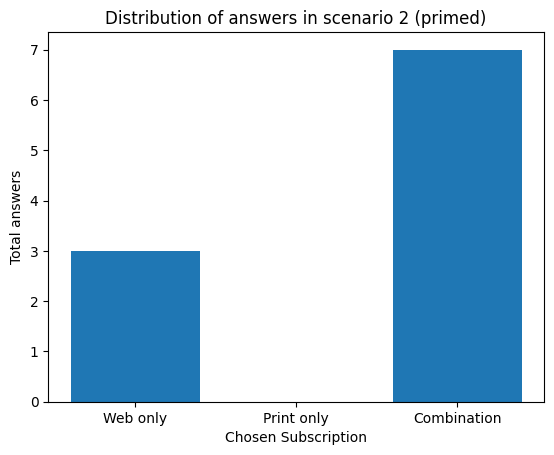

In [12]:
# Set labels
labels = ['Web only', 'Print only', 'Combination']

# Create a bar graph
plt.bar(labels, [A_2_mr, B_2_mr, C_2_mr])

# Add labels and a title
plt.xlabel('Chosen Subscription')
plt.ylabel('Total answers')
plt.title('Distribution of answers in scenario 2 (primed)')

# Show the plot
plt.show()

##### Random problem for Prospect Theory, that might be interesting

Problem 2
Which would you choose?
lose $100 with certainty
or
50% chance to win $50
50% chance to lose $200
Would your choice change if your
overall wealth were higher by $100?